### Install the necessary libraries

In [1]:
!pip install tensorflow 

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.1


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install keras numpy pillow tk pywin32


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

### Load and Preprocess MNIST Data

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Build the CNN Model

In [4]:
# Define the model
batch_size = 128
num_classes = 10
epochs = 12

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,162 (910.79 KB)

 Trainable params: 233,162 (910.79 KB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
# Train the model
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))
print("The model has successfully trained")

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model.save('mnist.keras')
print("Saving the model as mnist.keras")

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7209 - loss: 0.8140 - val_accuracy: 0.9788 - val_loss: 0.0675
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9654 - loss: 0.1325 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9772 - loss: 0.0879 - val_accuracy: 0.9885 - val_loss: 0.0366
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9830 - loss: 0.0669 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9855 - loss: 0.0571 - val_accuracy: 0.9901 - val_loss: 0.0311
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9875 - loss: 0.0487 - val_accuracy: 0.9919 - val_loss: 0.0296
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9893 - loss: 0.0417 - val_accuracy: 0.9906 - val_loss: 0.0297
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9903 - loss: 0.0392 - 

### Visualize Training Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


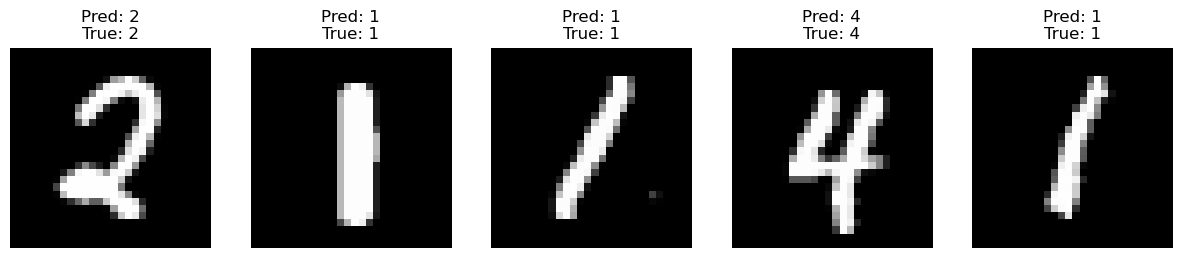

Test accuracy: 99.20%


In [10]:
# Load the model
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

model = load_model('mnist.keras')

# Load MNIST test data
_, (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255
y_test = keras.utils.to_categorical(y_test, 10)

# Predict on 5 random test images
num_samples = 5
indices = np.random.randint(0, x_test.shape[0], num_samples)
predictions = model.predict(x_test[indices])
predicted_digits = np.argmax(predictions, axis=1)
actual_digits = np.argmax(y_test[indices], axis=1)

# Display the images and predictions
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_digits[i]}\nTrue: {actual_digits[i]}')
    plt.axis('off')
plt.show()

# Calculate overall test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {score[1] * 100:.2f}%")

### Test the Model on MNIST Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


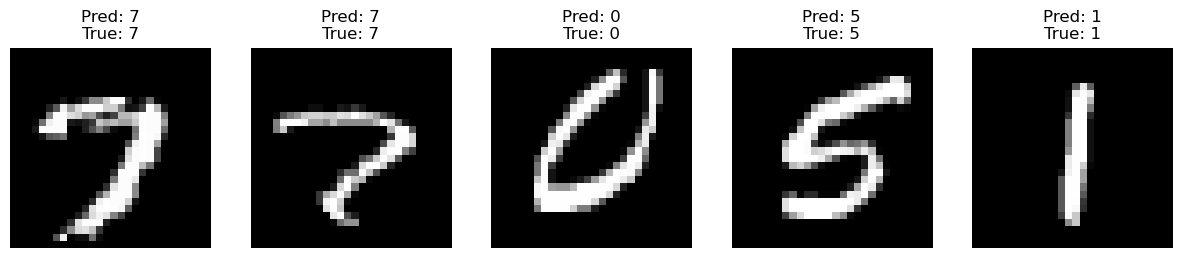

Test accuracy: 99.20%


In [8]:
# Load the model
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

model = load_model('mnist.keras')

# Load MNIST test data
_, (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32') / 255
y_test = keras.utils.to_categorical(y_test, 10)

# Predict on 5 random test images
num_samples = 5
indices = np.random.randint(0, x_test.shape[0], num_samples)
predictions = model.predict(x_test[indices])
predicted_digits = np.argmax(predictions, axis=1)
actual_digits = np.argmax(y_test[indices], axis=1)

# Display the images and predictions
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[indices[i]].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_digits[i]}\nTrue: {actual_digits[i]}')
    plt.axis('off')
plt.show()

# Calculate overall test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {score[1] * 100:.2f}%")

### Compare with MNIST Digits

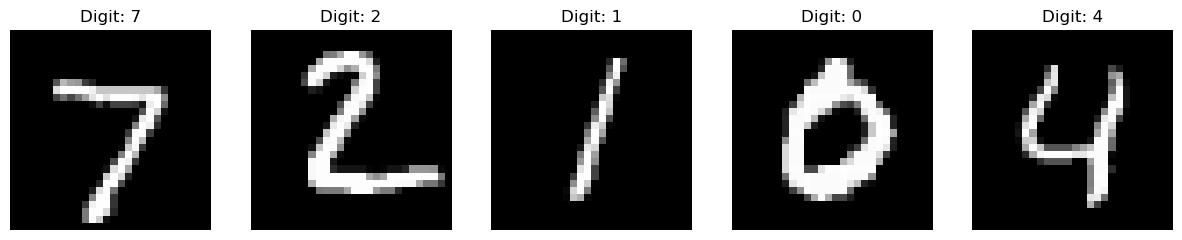

In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

_, (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Digit: {y_test[i]}")
    plt.axis('off')
plt.show()

### Test the Model on a Custom Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted digit: 8, Confidence: 69%


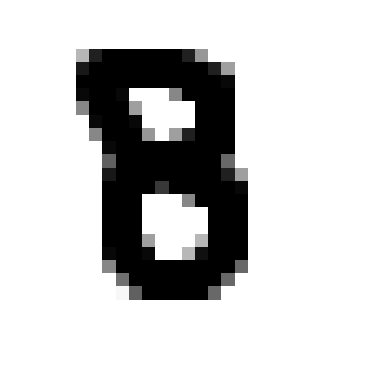

In [3]:
from PIL import Image
from keras.models import load_model
import numpy as np

# Load the model
model = load_model('mnist.keras')

def predict_digit(img):
    img = img.resize((28, 28))
    img = img.convert('L')
    img = np.array(img)
    img = np.invert(img)  # Invert to match MNIST (black digit, white background)
    img = img.reshape(1, 28, 28, 1)
    img = img / 255.0
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

# Load and predict on a custom image
img = Image.open(r"C:\Users\hp\Handwriting_detection_project\digit.png")  # Replace with your image file
digit, acc = predict_digit(img)
print(f"Predicted digit: {digit}, Confidence: {int(acc * 100)}%")

# Display the image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()